# Importing the Dependencies

In [1]:
!pip install xgboost

In [2]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Importing the Boston House Price Dataset

In [3]:
house_price_dataset = sklearn.datasets.load_boston()

In [4]:
print(house_price_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

# Data Preprocessing and Analysis

In [5]:
print(type(house_price_dataset))

<class 'sklearn.utils.Bunch'>


In [6]:
print(type(house_price_dataset.data))

<class 'numpy.ndarray'>


In [7]:
df_house_price = pd.DataFrame(house_price_dataset.data)

In [8]:
df_house_price.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
df_house_price = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [10]:
df_house_price.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
df_house_price["price"] = house_price_dataset.target

In [12]:
df_house_price.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
df_house_price.shape

(506, 14)

In [14]:
df_house_price.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [15]:
df_house_price.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Understanding the correlation between various features in the DataFrame

1. Postive Correlation - change in one value (+ve change or -ve change) has similar impact on the other value, both variable changes in the same direction

2. Negative Correlation - change in one value (+ve change or -ve change) has an adverse impact on the other value, both variable changes in opposite direction


Here we are looking at the relationship between the different features in our DataFrame

In [16]:
correlation = df_house_price.corr()

In [17]:
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

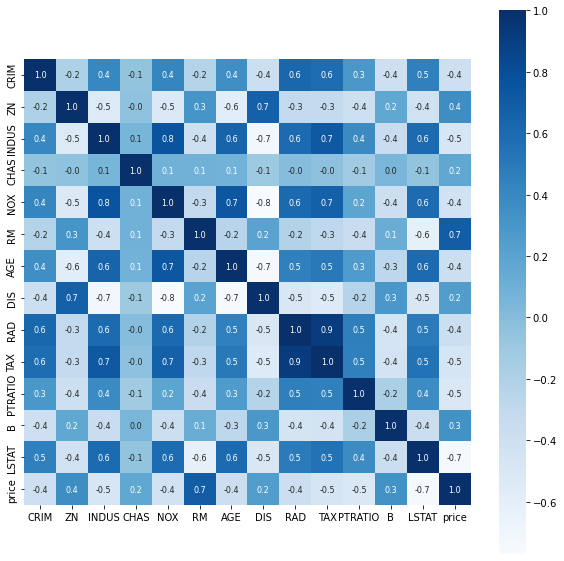

In [18]:
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues')

Splitting the data and Target 

In [19]:
X = df_house_price.drop(columns='price', axis = 1)
Y = df_house_price['price']

In [20]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [21]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


Splitting the data into Training data and Test data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


In [24]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [25]:
print(X_train)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
321  0.18159   0.0   7.38   0.0  0.493  6.376  54.3  4.5404  5.0  287.0   
37   0.08014   0.0   5.96   0.0  0.499  5.850  41.5  3.9342  5.0  279.0   
286  0.01965  80.0   1.76   0.0  0.385  6.230  31.5  9.0892  1.0  241.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
25   0.84054   0.0   8.14   0.0  0.538  5.599  85.7  4.4546  4.0  307.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
22   1.23247   0.0   8.14   0.0  0.538  6.142  91.7  3.9769  4.0  307.0   
72   0.09164   0.0  10.81   0.0  0.413  6.065   7.8  5.2873  4.0  305.0   
493  0.17331   0.0   9.69   0.0  0.585  5.707  54.0  2.3817  6.0  391.0   
15   0.62739   0.0   8.14   0.0  0.538  5.834  56.5  4.4986  4.0  307.0   
168  2.30040   0.0  19.58   0.0  0.605  6.319  96.1  2.1000  5.0  403.0   

     PTRATIO       B  LSTAT  
321     19.6  396.90   6.87  
37      19.2  396.90   8.77  
286     1

In [26]:
print(X_test)

         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
463   5.82115   0.0  18.10   0.0  0.713  6.513  89.9  2.8016  24.0  666.0   
152   1.12658   0.0  19.58   1.0  0.871  5.012  88.0  1.6102   5.0  403.0   
291   0.07886  80.0   4.95   0.0  0.411  7.148  27.7  5.1167   4.0  245.0   
183   0.10008   0.0   2.46   0.0  0.488  6.563  95.6  2.8470   3.0  193.0   
384  20.08490   0.0  18.10   0.0  0.700  4.368  91.2  1.4395  24.0  666.0   
..        ...   ...    ...   ...    ...    ...   ...     ...   ...    ...   
200   0.01778  95.0   1.47   0.0  0.403  7.135  13.9  7.6534   3.0  402.0   
12    0.09378  12.5   7.87   0.0  0.524  5.889  39.0  5.4509   5.0  311.0   
129   0.88125   0.0  21.89   0.0  0.624  5.637  94.7  1.9799   4.0  437.0   
194   0.01439  60.0   2.93   0.0  0.401  6.604  18.8  6.2196   1.0  265.0   
320   0.16760   0.0   7.38   0.0  0.493  6.426  52.3  4.5404   5.0  287.0   

     PTRATIO       B  LSTAT  
463     20.2  393.82  10.29  
152     14.7  3

In [27]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
print(X_train)

[[-0.37743861 -0.47456976 -0.5837312  ...  0.52359086  0.45391267
  -0.83410575]
 [-0.38918729 -0.47456976 -0.78968387 ...  0.33155209  0.45391267
  -0.56340806]
 [-0.39619249  3.16608882 -1.39883965 ... -0.14854484 -0.13442027
   0.02927739]
 ...
 [-0.3783975  -0.47456976 -0.24869553 ...  0.33155209  0.45391267
  -0.10179728]
 [-0.3258116  -0.47456976 -0.47350302 ...  1.19572656  0.44029484
  -0.6061498 ]
 [-0.13206441 -0.47456976  1.18572129 ... -1.82888409 -0.60795914
  -0.23144722]]


In [29]:
print(X_test)

[[ 0.27566504 -0.47456976  0.97106639 ...  0.81164902  0.42114476
  -0.34684992]
 [-0.26800163 -0.47456976  1.18572129 ... -1.82888409 -0.11654687
  -0.08612531]
 [-0.38933552  3.16608882 -0.93617133 ...  0.33155209  0.45391267
  -1.3056896 ]
 ...
 [-0.2964127  -0.47456976  1.52075696 ...  1.29174595  0.45391267
   0.80005342]
 [-0.39680164  2.25592418 -1.22914625 ... -1.39679686  0.23900624
  -1.18886218]
 [-0.37905876 -0.47456976 -0.5837312  ...  0.52359086  0.45391267
  -0.78708983]]


In [30]:
print(Y.shape, Y_train.shape, Y_test.shape)

(506,) (404,) (102,)


In [31]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


In [32]:
print(Y_train)

321    23.1
37     21.0
286    20.1
2      34.7
25     13.9
       ... 
22     15.2
72     22.8
493    21.8
15     19.9
168    23.8
Name: price, Length: 404, dtype: float64


In [33]:
print(Y_test)

463    20.2
152    15.3
291    37.3
183    32.5
384     8.8
       ... 
200    32.9
12     21.7
129    14.3
194    29.1
320    23.8
Name: price, Length: 102, dtype: float64


# Model Training

Model Training ---> XGBoost Regressor

In [34]:
model = XGBRegressor()

In [35]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Evaluation
1. R Squared Error
2. Mean Absolute Error

Prediction on training data

In [36]:
training_data_prediction = model.predict(X_train)

In [37]:
print(training_data_prediction)

[23.147501  20.99463   20.090284  34.69053   13.903663  13.510157
 21.998634  15.1940975 10.899711  22.709627  13.832816   5.592794
 29.810236  49.99096   34.89215   20.607384  23.351097  19.23555
 32.695698  19.641418  26.991022   8.401829  46.00729   21.708961
 27.062933  19.321356  19.288303  24.809872  22.61626   31.70493
 18.542515   8.697379  17.395294  23.700663  13.304856  10.492197
 12.688369  25.016556  19.67495   14.902088  24.193798  25.007143
 14.900281  16.995798  15.6009035 12.699232  24.51537   14.999952
 50.00104   17.525454  21.184624  31.998049  15.613355  22.89754
 19.325378  18.717896  23.301125  37.222923  30.09486   33.102703
 21.00072   49.999332  13.405827   5.0280113 16.492886   8.405072
 28.64328   19.499939  20.586452  45.402164  39.79833   33.407326
 19.83506   33.406372  25.271482  50.001534  12.521657  17.457413
 18.61758   22.602625  50.002117  23.801117  23.317268  23.087355
 41.700035  16.119293  31.620516  36.069206   7.0022025 20.3827
 19.996452  11.

In [38]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 0.9999948236320982
Mean Absolute Error: 0.0145848437110976


Visualizing the actual Prices and predicted prices

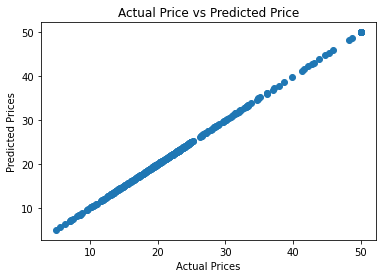

In [39]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on test data

In [40]:
test_data_prediction = model.predict(X_test)

In [41]:
print(test_data_prediction)

[20.288406  20.60247   30.9758    29.910797   8.624953  14.235525
 23.523052  29.730324  31.97293   22.015892  27.946804  24.034412
 20.771402  21.849985  12.024127  22.074675  18.487509  11.052485
  8.141267  15.730722  23.163914  20.233883  35.700928  19.041637
 15.129744  19.334904  47.067314  30.426474  32.729023  17.345776
 17.889462  19.40687   30.769133  25.431686  12.05332   17.900238
 11.031679  21.109531  20.64321   21.982754  25.016281  12.648555
 31.042107   7.106914  18.685764  14.380013  34.902393  16.130005
 32.98537   10.950912  27.335018  29.399937   7.0065055 35.398712
 22.978228  18.582758  19.224293  20.003431  15.341814  22.38517
 19.077105  21.955967  18.91404   32.77595   32.76772   24.36317
 48.262913  23.385014  10.551914  22.664684  14.671612   8.881822
 16.700302  17.221045  26.204681  26.826794  21.590458  21.61216
 19.662537  23.533224  33.25156   17.105299  19.517323  29.344427
 48.885273  35.723255  18.257914  24.461905  27.235567  21.319864
 21.661198  2

In [42]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)

score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 0.8757242820183986
Mean Absolute Error: 2.232154156179989


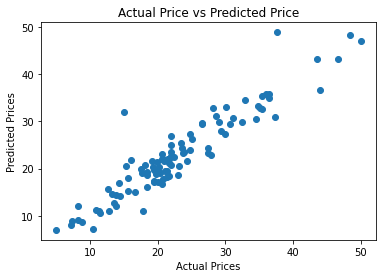

In [43]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Model Training

Model Training ---> Linear Regression

In [44]:
model_LinearRegression = LinearRegression()

In [45]:
model_LinearRegression.fit(X_train, Y_train)

LinearRegression()

Evaluation
1. R Squared Error
2. Mean Absolute Error

Prediction on training data

In [46]:
training_data_prediction = model_LinearRegression.predict(X_train)

In [47]:
print(training_data_prediction)

[25.01156658 23.20086342 19.63206629 30.79723661 13.29598163 12.35655178
 21.17619058 11.52105413 13.48284934 23.29619143 16.67181245 11.9640623
 32.53526883 25.38737924 29.80188665 19.51269487 24.14966495 24.10079632
 30.6933436  19.14366521 33.53309203  3.93459665 41.11203484 24.48533152
 20.09948308 23.54618062 21.50057915 25.02443747 22.39275602 33.67942244
 25.49286716  8.07877994 17.45164918 10.02711469 20.30483806 12.97802751
 18.36662544 25.4320083  14.00655745 17.89557148 24.77620977 28.90131112
 17.27439484 23.1865498  12.62489379 11.32274928 27.4978866  19.49269776
 44.80229099 16.9529603  22.44602306 33.66680303 20.2706101  20.70205114
 20.98558754 21.63228494 27.05322369 33.11940621 25.61757987 32.73314444
 20.91920151 41.11899411 15.32086807  8.42394611 22.84480968 13.72210624
 28.60744627 17.09291577 26.76454185 39.14699941 34.90240572 35.55989745
 21.98217997 28.96612576 25.11129326 42.52704888 19.53053513 22.63970213
 17.14416523 27.37214688 33.68385271 25.77228001 26.

In [48]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 0.7285831776605591
Mean Absolute Error: 3.3844575399167964


Visualizing the actual Prices and predicted prices

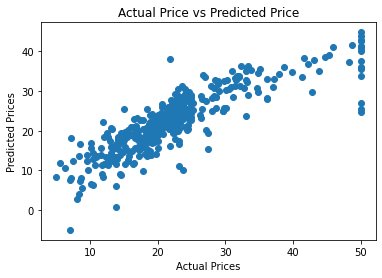

In [49]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on test data

In [50]:
test_data_prediction = model_LinearRegression.predict(X_test)

In [51]:
print(test_data_prediction)

[23.01506153 21.2115869  33.71590384 31.56542369  3.1826268   3.15381954
 27.40305304 22.2126176  14.86506114 21.34105453 30.95942941 26.70065029
 21.12624382 18.37282564 17.64315354 25.38194186 24.42970445 13.36957057
  8.66686786 18.57490534 21.73966467 20.34270529 36.5461105  20.59627495
 19.87979627 15.75766967 37.11632999 34.85897895 30.83458635 23.23441285
 18.68278505 20.749546   31.84560076 30.20214207 13.3861702  15.87078398
 13.70766096 23.74163998 25.95135088 23.18325878 28.99906539 12.50341936
 31.08347911  6.39401895 23.71801218 20.61523929 33.15362417 19.21862493
 35.89603081  0.82365329 31.90288611 31.69640543  6.58849712 34.62762996
 20.41162545 19.69277608 19.53445865 18.58689088 15.81420496 22.98764309
 19.65947045 16.36377019 18.48783369 32.76568172 35.49022568 24.58349631
 41.5854766  32.94818456 14.60990256 27.43178268  8.04470074  5.61185652
 22.21428332 18.72817007 31.02824788 26.04494485 24.60357003 24.84231113
 25.38796252 24.87762205 33.71343923 19.72606026 20

In [52]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)

score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 0.7789207451814417
Mean Absolute Error: 3.113043746893428


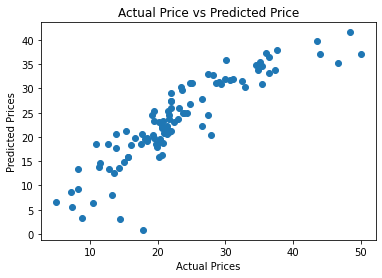

In [53]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Model Training

Model Training ---> Polynomial Regression

In [54]:
poly_reg = PolynomialFeatures(degree = 2)

X_poly = poly_reg.fit_transform(X_train)

model_LinearRegression = LinearRegression()

In [55]:
model_LinearRegression.fit(X_poly, Y_train)

LinearRegression()

Evaluation
1. R Squared Error
2. Mean Absolute Error

Prediction on training data

In [56]:
training_data_prediction = model_LinearRegression.predict(X_poly)

In [57]:
print(training_data_prediction)

[24.96472168 22.31469727 20.09094238 33.40820312 14.85827637 11.56359863
 21.84399414 14.04699707 11.03845215 22.32128906 18.97094727  5.59008789
 31.27709961 33.09924316 32.97302246 19.88513184 22.11401367 20.16137695
 30.86279297 23.71130371 32.67858887  5.90087891 44.85888672 20.35412598
 18.33044434 18.25524902 17.85974121 23.13391113 22.67614746 35.11682129
 22.03540039  7.8404541  15.77893066 25.42590332 13.77478027  7.2722168
 16.71508789 23.70141602 16.55725098 14.9954834  25.05285645 28.95483398
 16.41113281 14.94152832 14.30224609 15.14111328 26.7331543  20.65283203
 50.25415039 16.90197754 22.27124023 32.50756836 15.68920898 21.63586426
 19.80664062 20.55175781 23.90490723 36.91442871 30.02648926 32.87268066
 19.37304688 51.72729492 13.25891113  2.04675293 15.59912109  9.07324219
 27.85058594 18.04162598 21.92346191 45.10705566 40.66955566 37.94909668
 18.66625977 32.84020996 24.03173828 49.07092285 15.73120117 19.30151367
 22.9519043  25.73571777 48.03979492 22.4486084  28.

In [58]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 0.9295740967497872
Mean Absolute Error: 1.776429008257271


Visualizing the actual Prices and predicted prices

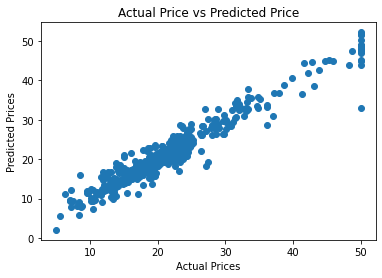

In [59]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on test data

In [60]:
test_data_prediction = model_LinearRegression.predict(poly_reg.transform(X_test))

In [61]:
print(test_data_prediction)

[22.71289062 12.21069336 33.47814941 31.31445312 11.49938965 17.13537598
 26.52026367 26.40124512 20.54309082 22.07263184 33.47009277 23.09960938
 18.18530273  9.52172852 12.61621094 23.20703125 19.4140625  11.02844238
  8.51953125 13.86828613 24.73925781 19.53283691 34.71862793 19.56774902
 17.19360352 12.16882324 46.34643555 33.68029785 30.99169922 17.77734375
 22.38989258 22.24414062 31.55163574 27.4486084  10.5723877  14.52539062
 12.43395996 15.00280762 25.84851074 20.93835449 26.08813477 13.45446777
 31.72375488  8.3963623  22.70776367 19.59936523 33.95361328 15.63330078
 30.9552002  12.25524902 32.4942627  30.31054688  3.81188965 35.6237793
 26.42675781 17.77624512 20.43286133 17.61450195 15.24414062 23.83178711
 17.51293945 20.18481445 18.08703613 33.02832031 36.29711914 24.20825195
 46.76916504 28.06201172 15.02990723 22.34448242 18.46630859  8.87207031
 15.37402344 18.59960938 27.12609863 19.3416748  21.03515625 21.40197754
 21.73742676 26.01940918 33.29199219 18.86694336 20.

In [62]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)

score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 0.8962613133053395
Mean Absolute Error: 2.369001081878064


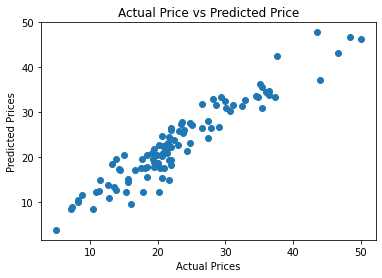

In [63]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Model Training

Model Training ---> Support Vector Regression

In [64]:
model_SVR = SVR(kernel = 'rbf')

In [65]:
model_SVR.fit(X_train, Y_train)

SVR()

Evaluation
1. R Squared Error
2. Mean Absolute Error

Prediction on training data

In [66]:
training_data_prediction = model_SVR.predict(X_train)

In [67]:
print(training_data_prediction)

[23.67756987 21.41900661 21.75014998 30.81366001 15.56361687 13.75836101
 20.46901837 16.83747332 15.91307161 21.93218773 15.10610698 11.78043847
 29.39394276 19.03583338 27.48465904 20.70000574 22.42314788 21.05894881
 31.70319968 19.04870165 24.52567281 12.02473067 30.62222338 22.14530087
 19.38375507 20.11020177 21.25066778 24.70010096 22.12543728 32.5466519
 22.37702796 12.09661618 18.17242413 19.98468892 14.89110828 12.23167016
 14.87175718 22.5735953  15.95666156 14.79966056 24.44574199 23.83211809
 15.24823089 20.10572488 15.60895132 14.98733563 26.21495366 19.87669462
 27.40727584 17.55476034 21.9578156  31.26340724 19.73049681 23.01391434
 19.48337447 20.36936269 23.3996191  30.73900616 23.88064909 31.3368836
 21.03032945 35.81712086 18.33953012 18.69164318 24.32855956 12.92207348
 25.93068108 16.79901398 22.47167638 36.70349955 33.19097244 33.06558771
 22.28551703 28.80165422 23.88939994 27.50117165 15.32086679 20.64265183
 20.28996121 25.24719695 24.3405767  23.70855185 23.3

In [68]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 0.6457713868658359
Mean Absolute Error: 3.017128102774205


Visualizing the actual Prices and predicted prices

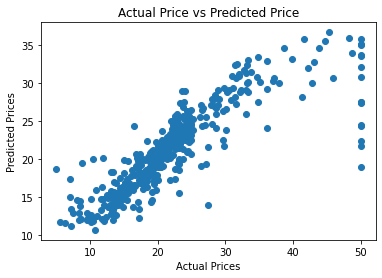

In [69]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on test data

In [70]:
test_data_prediction = model_SVR.predict(X_test)

In [71]:
print(test_data_prediction)

[19.94747214 19.96417246 29.56198983 25.96431054 12.97345366 14.82110214
 27.88276353 25.67376534 18.75112175 20.57840039 28.56278923 25.97494628
 20.82696758 19.0627529  13.06181039 23.23439694 21.75775925 12.7185933
 12.33850555 15.46240981 22.66227942 18.85899281 31.35866968 18.05118214
 15.3247938  18.81885685 30.49003281 29.82569011 27.80692912 22.67404115
 15.68020166 21.40697419 29.47553992 26.04245715 13.2644401  18.33194108
 12.44271202 21.62330521 23.47841607 22.01841957 27.56420347 15.08779445
 30.7428012  12.86520078 21.35138346 16.50141824 32.04504212 16.05870068
 29.4399935  15.35202364 29.71021587 28.80847406 14.24065    32.02508156
 16.47919027 19.54160599 19.3040749  17.79788663 16.549324   22.69217508
 19.04490904 20.62845673 17.93746833 29.41448098 31.61582376 23.10611921
 32.09473313 26.99861522 13.58975998 25.89724227 15.44313102 12.13822273
 20.50058549 18.20726835 26.22979423 23.33999442 21.60035278 21.43417924
 22.34199073 24.08135369 30.10959463 18.49464663 19.

In [72]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)

score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 0.7577721268821174
Mean Absolute Error: 2.987420979831198


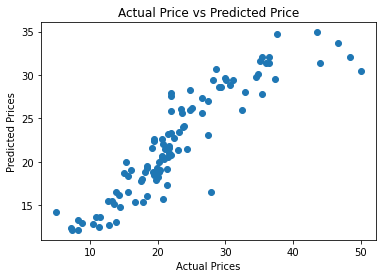

In [73]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Model Training

Model Training ---> Decision Tree Regression

In [74]:
model_DecisionTreeRegression = DecisionTreeRegressor(random_state = 0)

In [75]:
model_DecisionTreeRegression.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

Evaluation
1. R Squared Error
2. Mean Absolute Error

Prediction on training data

In [76]:
training_data_prediction = model_DecisionTreeRegression.predict(X_train)

In [77]:
print(training_data_prediction)

[23.1 21.  20.1 34.7 13.9 13.5 22.  15.2 10.9 22.7 13.8  5.6 29.8 50.
 34.9 20.6 23.4 19.2 32.7 19.6 27.   8.4 46.  21.7 27.1 19.4 19.3 24.8
 22.6 31.7 18.5  8.7 17.4 23.7 13.3 10.5 12.7 25.  19.7 14.9 24.2 25.
 14.9 17.  15.6 12.7 24.5 15.  50.  17.5 21.2 32.  15.6 22.9 19.3 18.7
 23.3 37.2 30.1 33.1 21.  50.  13.4  5.  16.5  8.4 28.7 19.5 20.6 45.4
 39.8 33.4 19.8 33.4 25.3 50.  12.5 17.4 18.6 22.6 50.  23.8 23.3 23.1
 41.7 16.1 31.6 36.1  7.  20.4 20.  12.  25.  50.  37.9 23.1 41.3 17.6
 16.3 30.1 22.9 19.8 17.1 18.9 18.9 22.6 23.2 33.2 15.  11.7 18.8 20.8
 18.  19.6 50.  17.2 16.4 17.5 14.6 33.1 14.5 43.8 34.9 20.4 14.6  8.1
 11.8 11.8 18.7  6.3 24.  13.1 19.6 50.  22.3 18.9 31.2 20.7 32.2 36.2
 14.2 15.7 50.  20.4 16.2 13.4 50.  31.6 12.3 19.2 29.8 31.5 22.8 10.2
 24.1 23.7 22.  13.8 28.4 33.2 13.1 19.  26.6 37.  30.8 22.8 10.2 22.2
 24.5 36.2 23.1 20.1 19.5 10.8 22.7 19.5 20.1  9.6 42.8 48.8 13.1 20.3
 24.8 14.1 21.7 22.2 33.  21.1 25.  19.1 32.4 13.6 15.1 23.1 27.5 19.4
 26.5 27

In [78]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 1.0
Mean Absolute Error: 0.0


Visualizing the actual Prices and predicted prices

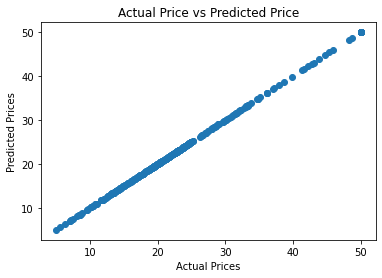

In [79]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on test data

In [80]:
test_data_prediction = model_DecisionTreeRegression.predict(X_test)

In [81]:
print(test_data_prediction)

[19.5 20.8 28.5 36.2  7.2 16.2 31.  28.5 11.7 19.6 22.8 31.5 18.6 14.5
 10.2 24.4 19.3  8.5  8.7 17.8 22.2 20.1 33.8 16.8 14.2 17.4 42.3 33.3
 32.7 24.3 10.4 23.4 33.1 22.5 27.5 13.1 12.3 23.2 19.7 20.6 28.4 13.1
 36.1  7.2 19.1 14.2 34.9 19.4 37.9 17.2 30.5 22.5  6.3 33.  11.7 19.6
 19.5 23.1 18.4 19.4 19.5 23.1 17.5 31.6 32.  23.7 50.  31.   8.5 22.
 23.7  5.6 11.9 19.1 30.1 23.9 20.6 24.  18.7 24.4 33.  16.6 19.1 31.2
 44.8 33.8 10.4 19.8 30.5 20.6 20.3 19.2 13.1 32.7 31.5  8.8 42.3 34.9
 18.8 16.2 29.8 23.1]


In [82]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)

score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 0.7098117242885484
Mean Absolute Error: 3.5411764705882347


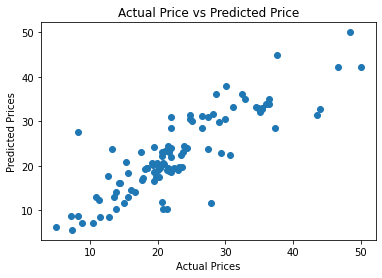

In [83]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Model Training

Model Training ---> Random Forest Regression

In [84]:
model_RandomForestRegression = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [85]:
model_RandomForestRegression.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

Evaluation
1. R Squared Error
2. Mean Absolute Error

Prediction on training data

In [86]:
training_data_prediction = model_RandomForestRegression.predict(X_train)

In [87]:
print(training_data_prediction)

[23.61 20.68 20.73 34.48 15.17 13.34 21.63 15.83 12.56 22.16 14.1   7.03
 28.93 46.85 33.89 20.34 22.32 19.52 32.7  19.98 25.55  8.56 44.91 22.
 22.46 19.6  19.43 25.95 22.19 31.34 19.64  9.14 17.62 22.54 13.16 10.32
 13.16 24.77 19.16 15.26 24.07 24.67 15.73 17.78 15.88 14.64 26.78 17.39
 48.88 18.66 21.41 35.2  16.05 23.37 19.4  19.48 22.13 36.75 30.26 32.71
 21.77 44.   13.68  6.07 18.92  8.92 27.65 17.23 21.86 45.4  40.46 34.23
 20.52 36.71 24.37 48.48 12.96 19.02 19.47 22.71 43.92 23.95 24.21 20.5
 43.46 18.19 31.3  35.56  7.66 20.21 19.12 12.13 24.86 46.15 38.7  20.96
 32.29 17.76 14.93 28.53 21.61 19.91 17.54 19.73 19.2  21.45 18.78 33.23
 18.25 13.54 19.34 21.09 17.92 19.77 47.75 13.59 16.25 17.58 13.85 33.04
 14.61 44.29 34.54 20.47 15.55  8.78 11.35 12.62 18.87  8.39 22.52 11.64
 19.81 46.05 22.6  19.6  31.26 20.6  32.36 30.14 15.72 15.22 48.11 20.67
 16.23 12.27 50.   31.67 11.72 19.86 25.3  32.06 22.08  9.12 24.01 23.97
 22.82 11.56 27.53 33.4  14.14 19.6  26.46 33.59 30.8 

In [88]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 0.9713913790570533
Mean Absolute Error: 0.9827722772277229


Visualizing the actual Prices and predicted prices

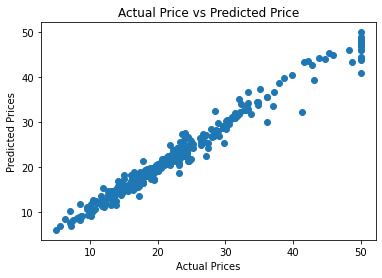

In [89]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on test data

In [90]:
test_data_prediction = model_RandomForestRegression.predict(X_test)

In [91]:
print(test_data_prediction)

[20.26 22.29 34.03 30.09  7.29 14.25 27.72 29.02 28.71 19.55 26.34 25.68
 20.66 20.95 10.88 23.12 16.77 11.86  9.36 14.79 24.   18.89 30.85 18.02
 15.13 19.06 43.65 32.55 34.09 20.42 17.49 20.84 30.7  24.75 12.8  18.52
 10.88 19.73 21.34 21.6  28.11 13.98 31.5   6.55 18.76 14.48 36.06 17.29
 28.91 12.77 29.14 26.08  6.47 34.01 32.42 19.47 19.48 19.36 16.2  22.56
 20.69 21.22 19.14 30.46 32.31 24.21 48.3  28.41 11.61 23.33 16.78  6.96
 19.64 16.23 27.65 24.49 22.06 20.57 20.99 22.88 35.17 17.7  17.71 30.
 46.74 31.04 17.44 21.72 30.73 20.01 20.9  20.01  9.84 36.8  39.42  9.87
 41.59 33.26 21.18 16.22 29.83 23.99]


In [92]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)

score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print(f"R squared error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R squared error: 0.8738853350695253
Mean Absolute Error: 2.3783333333333334


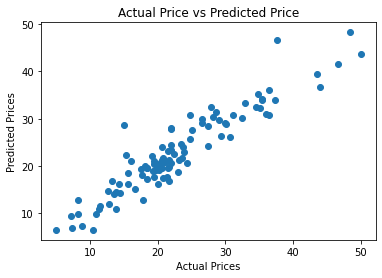

In [93]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()